# 4.  Implement a Perceptron model
## 1. Read the data
First read the files `Train.txt` and `Val.txt`. The first two columns of both files correspond to the input data. The third or last column corresponds to the labels. Separate the data so that:


* `x_train` contains all the input data for the training.
* `y_train` contains all labels for the training.
* `x_val` contains all input data for validation.
* `y_val` contains all labels for the validation.


In [1]:
import numpy as np
import pandas as pd
# To make the results reproducable
np.random.seed(1)

val = open("val.txt","r")
train = open("train.txt","r")
x_train = []
y_train = []
x_val = []
y_val = []

for zeile in val: 
    temp = zeile.split(" ")
    temp = list(filter(None, temp))
    x_val.append([float(temp[0]),float(temp[1])])
    y_val.append(int(temp[2]))
    
for zeile in train: 
    temp = zeile.split(" ")
    temp = list(filter(None, temp))
    x_train.append([float(temp[0]),float(temp[1])])
    y_train.append(int(temp[2]))
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)


val.close()
train.close()


## 2. Visualise the Data


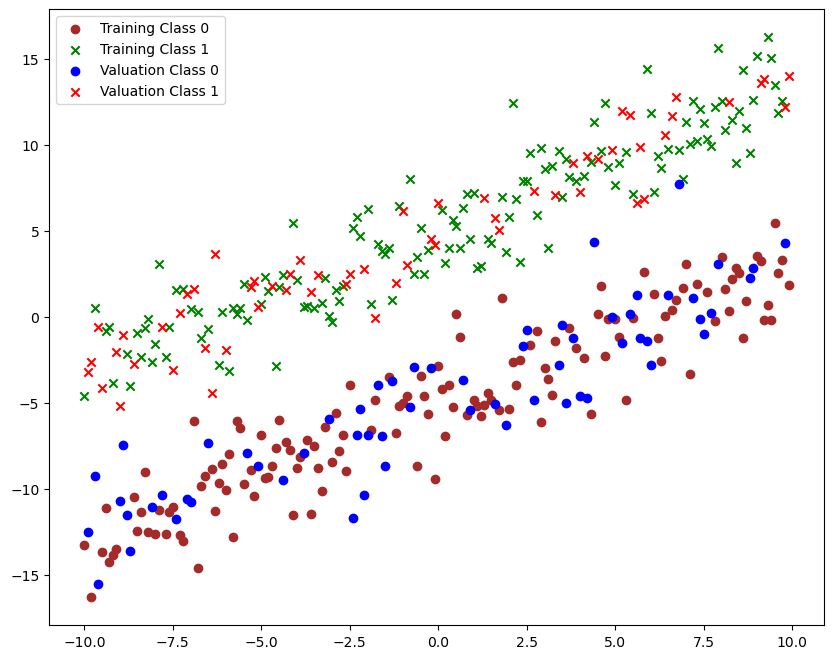

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.rcParams['figure.figsize'] = [10, 8]

val_colors = {'blue':0,'red':1}
vmap = ListedColormap(val_colors)

train_colors = ['black','green']
tmap = ListedColormap(train_colors)

def plot_data(x_train, y_train, x_val, y_val):
    # Plot training data
    plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color='brown',label=f'Training Class 0', marker='o')
    plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color='green',label=f'Training Class 1', marker='x')
    plt.scatter(x_val[y_val == 0, 0], x_val[y_val == 0, 1], color='blue',label=f'Valuation Class 0', marker='o')
    plt.scatter(x_val[y_val == 1, 0], x_val[y_val == 1, 1], color='red',label=f'Valuation Class 1', marker='x')
    plt.legend()

plot_data(x_train, y_train, x_val, y_val)


## 3. Implementation of a Perzeptrons


In [7]:
import sys
# Um Klassendefinition auf mehrere Zellen aufteilen zu können.
#!{sys.executable} -m pip install jdc
import jdc


Now we define the class `Perzeptron` and the constructor. The constructor takes two parameters:


1. `input_neurons` a natural number > 0
2. `learning_rate` a rational number > 0

The following should be stored as class variables:


1. the weights `weights` between input layer and output layer.
2. the bias `bias`.
3. the learning rate `learning_rate`.

For the initialization of the weights and the bias, use equally distributed values between -0.01 and 0.01.





In [10]:
class Perzeptron:
    def __init__(self, eingabe_neuronen, lernrate=0.1):
        self.lernrate = lernrate
        self.b = np.random.uniform(-0.01, 0.01)
        self.w = np.random.uniform(low= 0.01, high= -0.01, size= (eingabe_neuronen))
        pass


Activation Function

In [13]:
%%add_to Perzeptron
def aktivierungsfkt(self, wert):
    return np.where(wert >= 0, 1,0)

Now implement the forward pass method. Use `self.weights` and `self.bias` to access the class variables.

**Note:** You probably know the definition of forward pass as:
$$\sum\limits_{i = 1}^{n} w_{i}x_{i} + b = w^Tx + b$$
Where $n$ is the number of input neurons. Since $x$ was stored in the transposed form and you probably stored $w$ as a column vector, it may be useful to calculate $x^Tw + b$.

In [17]:
%%add_to Perzeptron
def forward_pass(self, x):   
    output =self.aktivierungsfkt(np.dot(x,self.w) + self.b)
    return output

In the next method, the weight changes $\Delta w$ and $\Delta b$ are to be calculated for `w` and `b`. Since these depend on the input `x`, the predicted value `y_pred` and the actual value `y_GT`, these are passed as parameters. Again, pay attention to the dimension of `x` and `w`.

In [20]:
%%add_to Perzeptron
def backpropagation(self, x_transposed, y_GT, y_pred):
    w_delta = self.lernrate * np.dot((y_GT - y_pred) , x_transposed)
    b_delta = self.lernrate * (y_GT - y_pred)
    return (w_delta, b_delta)


In the following method, you are to implement the Gradient Descent algorithm to update the weights in `w` and the bias `b`. Assume that the gradients are given by `weights_delta` and `bias_delta`.

In [23]:
%%add_to Perzeptron
def gradient_descent(self, w_delta, b_delta):
    self.w = self.w + w_delta
    self.b = self.b + b_delta
    pass


Now complete the `evaluate` method. This takes two mandatory parameters `x_val` (model input) and `y_val` (expected model output) and computes the **Confusion Matrix**. In addition, the method shall compute and return the **recall**, **precision** and the $F_1$** score**. The optional parameter `print_F1` shall control whether the calculated $F_1$** score** is also output.

In [74]:
%%add_to Perzeptron
def evaluate(self, x_val, y_val, print_F1=True):
    y_pred = self.forward_pass(x_val)
    val_error = np.mean((y_pred - y_val) ** 2)
    print(f"val error {val_error}")
    self.matrix = np.zeros((2,2))
    #matrix[0,0] -> TP 
    #matrix[1,1] -> TN
    #matrix[1,0] -> FN
    #matrix[0,1] -> FP
    for i in range(len(y_pred)):
        if (y_pred[i] == y_val[i]):
            if (y_val[i] == 1):
                self.matrix[0,0] += 1
            else:
                self.matrix[1,1] += 1    
        else:
            
            if (y_val[i] == 1):
                self.matrix[1,0] += 1     
            else:
                self.matrix[0,1] += 1
               
    
    #recall = TP / (TP + FN)
    self.recall = self.matrix[0,0] / (self.matrix[0,0] + self.matrix[1,0]) if (self.matrix[0,0] + self.matrix[1,0]) > 0 else 0
    
    #precision = TP / (TP + FP)
    self.precision = self.matrix[0,0] / (self.matrix[0,0] + self.matrix[0,1]) if (self.matrix[0,0] + self.matrix[0,1]) > 0 else 0
    
    
    if print_F1:
         #f1 = (2 * TP) / (2 * TP + FP + FN)
        self.f1 = (2 * self.matrix[0,0]) / (2 * self.matrix[0,0] + self.matrix[0,1] + self.matrix[1,0]) if (2 * self.matrix[0,0] + self.matrix[0,1] + self.matrix[1,0]) > 0 else 0
        print(f"F1 score: {self.f1}")
        print("")

Now implement the `train` method. This takes the training data `x_train` (input) and `y_train` (label) and validation data `x_val` (input) and `y_val` (label). Use the `max_epochs` parameter to specify the number of epochs to be trained. You do not have to implement *Early Stopping`. 

In [77]:
%%add_to Perzeptron
def trainieren(self, x_train, y_train, x_val, y_val, max_epochen):
    for e in range(max_epochen):
        y_pred = np.zeros(len(x_train))
        for i in range(len(x_train)):
            y_pred[i] = self.forward_pass(x_train[i])
            w_delta, b_delta = self.backpropagation(x_train[i], y_train[i], y_pred[i])
            self.gradient_descent(w_delta, b_delta)

        train_error = np.mean((y_pred - y_train) ** 2)
        print(f"Epoch {e}: train error {train_error}")
        
        self.evaluate(x_val, y_val)

Erzeugen Sie ein Objekt der Klasse Perzeptron und trainieren Sie das Perzeptron mit einer Lernrate von 0.1 und maximal 5 Epochen. Was fällt Ihnen auf? Welchen Trainings und welchen Validierungsfehler bekommen Sie?

In [80]:
perzeptron = Perzeptron(eingabe_neuronen = len(x_train[0]), lernrate = 0.1)
perzeptron.trainieren(x_train, y_train, x_val, y_val, 5)

Epoch 0: train error 0.02857142857142857
val error 0.03333333333333333
F1 score: 0.9661016949152542

Epoch 1: train error 0.02142857142857143
val error 0.016666666666666666
F1 score: 0.9833333333333333

Epoch 2: train error 0.0
val error 0.016666666666666666
F1 score: 0.9833333333333333

Epoch 3: train error 0.0
val error 0.016666666666666666
F1 score: 0.9833333333333333

Epoch 4: train error 0.0
val error 0.016666666666666666
F1 score: 0.9833333333333333



Schreiben Sie eine Methode `finde_trennflaeche()`, die die Trennfläche des Modells repräsentiert.

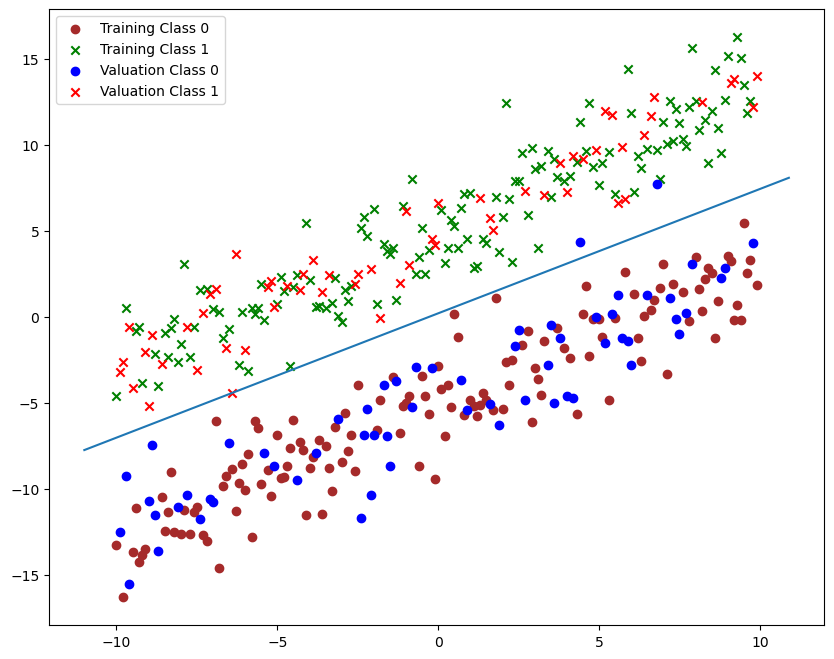

In [83]:
"""
Idee: Da wir Wissen, dass die Trennfläche eine Gerade ist, können wir an den Rändern (auf der x-Achse
bei -10 und 10) von unten nach oben (in y-Richtung) laufen. Sobald ein Wechsel der vorhergesagten Klasse
stattfindet, merken wir uns diesen y-Wert. Wenn wir das an beiden Wändern machen, bekommen wir zwei Tuple
(-10, y_1) und (10, y_2). Diese beiden Punkte können wir zeichnen und eine Gerade durch beide Punkte zeichnen.
"""
def finde_trennflaeche():

    plot_data(x_train, y_train, x_val, y_val)

    t = np.arange(-11, 11, 0.1)
    
    plt.plot(t, -((perzeptron.w[0]*t + 2*perzeptron.b)/perzeptron.w[1]))
    pass
finde_trennflaeche()


Denken Sie sich selbst eigene Punkte aus, die Sie anschließend von dem Perzeptron zuordnen lassen.

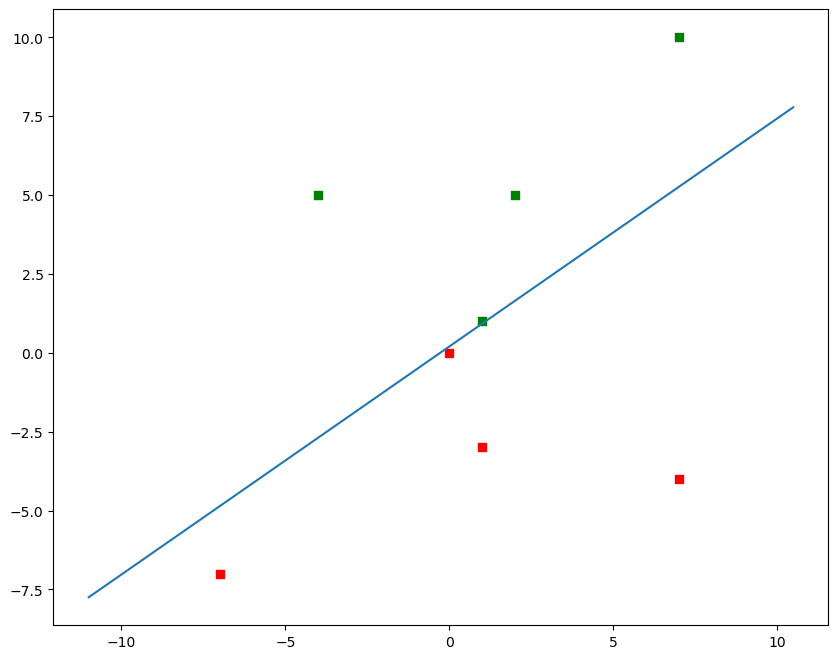

In [86]:
my_x_val = np.array([[0,0],
                     [-4,5],
                     [7,-4],
                     [1,1],
                     [2,5],
                     [1,-3],
                     [-7,-7],
                     [7,10]])

my_y_val = np.zeros(len(my_x_val))

for i in range(len(my_x_val)):
    my_y_val[i] = perzeptron.forward_pass(my_x_val[i])

plt.rcParams['figure.figsize'] = [10, 8]

pos_val = np.where(my_y_val == 1)
neg_val = np.where(my_y_val == 0)

plt.scatter(my_x_val[neg_val,0], my_x_val[neg_val,1], color="red", marker="s")
plt.scatter(my_x_val[pos_val,0], my_x_val[pos_val,1], color="green", marker="s")

t = np.arange(-11, 11, 0.5)

plt.plot(t, -((perzeptron.w[0]*t + 2*perzeptron.b)/perzeptron.w[1]))

Visualisieren Sie zum Schluss noch die Confusion Matrix, die durch die Evaluation des Perzeptrons auf den Validierungsdaten entsteht.

Recall: 1.0
Precision: 0.9672131147540983
F1-Score: 0.9833333333333333


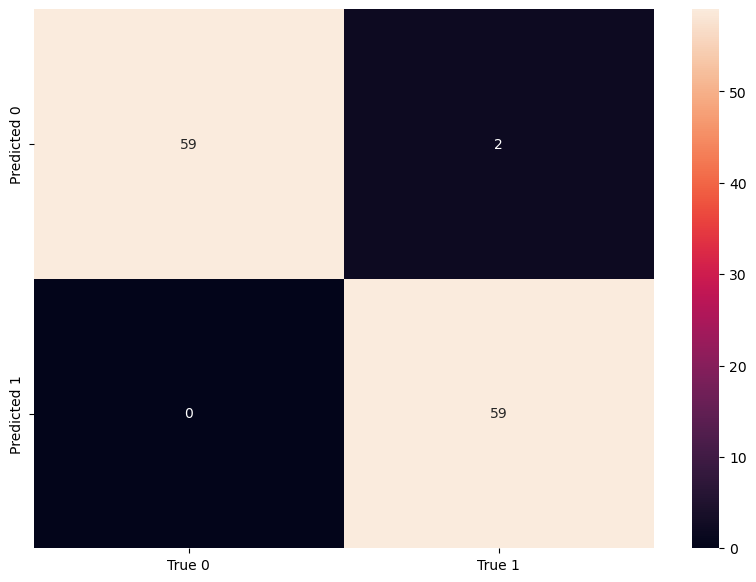

In [89]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

"True 0", "True 1","True 2"

df_cm = pd.DataFrame(perzeptron.matrix, index = ["Predicted 0" ,"Predicted 1"],
                  columns = ["True 0", "True 1"])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

print("Recall: " + str(perzeptron.recall))

print("Precision: " + str(perzeptron.precision))

print("F1-Score: " + str(perzeptron.f1))